In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/orbitaldata1/OrbitalData.csv


In [81]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [82]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('../input/orbitaldata1/OrbitalData.csv', index_col=0)
display(ion.head())


df = ion.copy()
df['stability'] = df['stability'].map({'unstable': 0, 'stable': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('stability', axis=1)
X_valid = df_valid.drop('stability', axis=1)
y_train = df_train['stability']
y_valid = df_valid['stability']

,stability
chaos score,
0.000105,stable
1.996855,unstable
0.906235,stable
1.877456,unstable
1.757629,unstable


In [83]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[0]),
    layers.Dense(100, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [84]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [85]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    # batch_size=512,
    epochs=200,
    callbacks=[early_stopping]
)

Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 0.6932 - binary_accuracy: 0.4896 - val_loss: 0.6929 - val_binary_accuracy: 0.5556
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.6931 - binary_accuracy: 0.5099 - val_loss: 0.6926 - val_binary_accuracy: 0.5556
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6930 - binary_accuracy: 0.5140 - val_loss: 0.6922 - val_binary_accuracy: 0.5556
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6924 - binary_accuracy: 0.5431 - val_loss: 0.6920 - val_binary_accuracy: 0.5556
Epoch 5/200
17/17 [==============================] - 0s 6ms/step - loss: 0.6930 - binary_accuracy: 0.5080 - val_loss: 0.6920 - val_binary_accuracy: 0.5556
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6928 - binary_accuracy: 0.5180 - val_loss: 0.6917 - val_binary_accuracy: 0.5556
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - lo

Best Validation Loss: 0.6889
Best Validation Accuracy: 0.5556


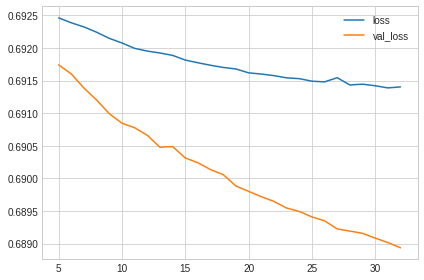

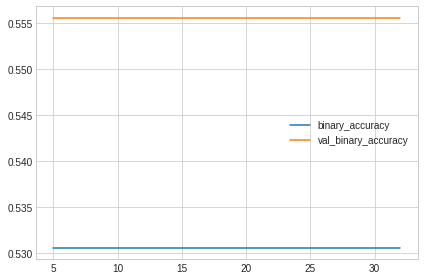

In [86]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))